# Fourier analysis ¶ - Wei Zhang

## Work in a pylab session: clean, basic tools¶


In [152]:
# This magic line loads numpy, scipy, matplotlib. 
# add the word inline to put figures inline
%pylab inline
%matplotlib inline
import scipy.io 

# xkcd style?
#plt.xkcd();

Populating the interactive namespace from numpy and matplotlib


## Experiment with specifying y(x)...

In [41]:
# nino 3.4 index and ssta data from 1950 to 1984
n34_file = scipy.io.loadmat('/Users/weizhang/Documents/Wei Zhang/research/nino/n34_50_84.mat')
y = n34_file.get('n34')
y = squeeze(y)
x = arange(size(y))
y = detrend(y) # this subtracts the mean

# ssta data  from 1950 to 1984
ssta_file = scipy.io.loadmat ('/Users/weizhang/Documents/Wei Zhang/research/nino/ssta_50_84.mat')
n = ssta_file.get('ssta')
n = squeeze(n)
m = arange(size(n))
n = detrend(n) # this subtracts the mean

## Plot the timeseries of nino3.4 and ssta

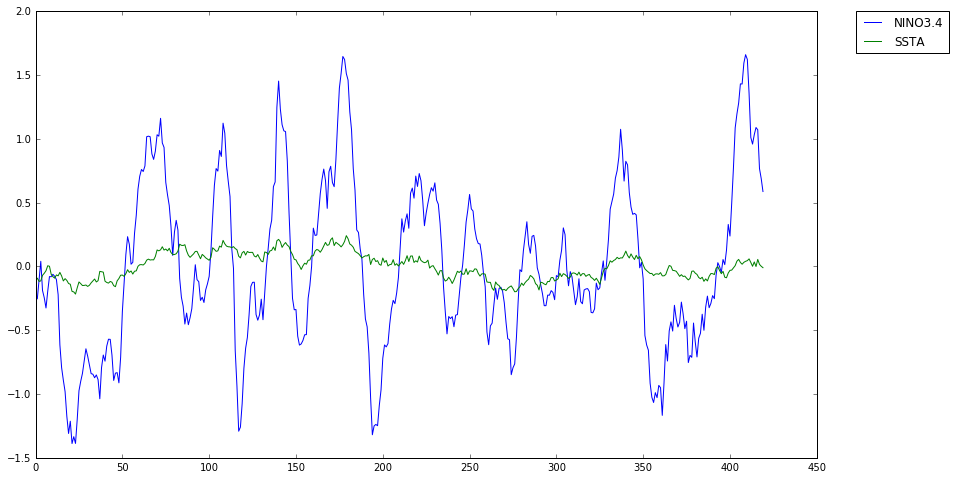

In [120]:
figure(1, figsize=(14, 8))
Line1, = plt.plot(x,y, label="NINO3.4", lw=1)
Line2, = plt.plot(m,n, label="SSTA", lw=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plot(x,y,m,n,'.', label='NINO3.4',label='SSTA', lw=1)
#title('Nino3.4 and SSTA')


## Consider SSTA data and plot timeseries, repeated for fft analysis

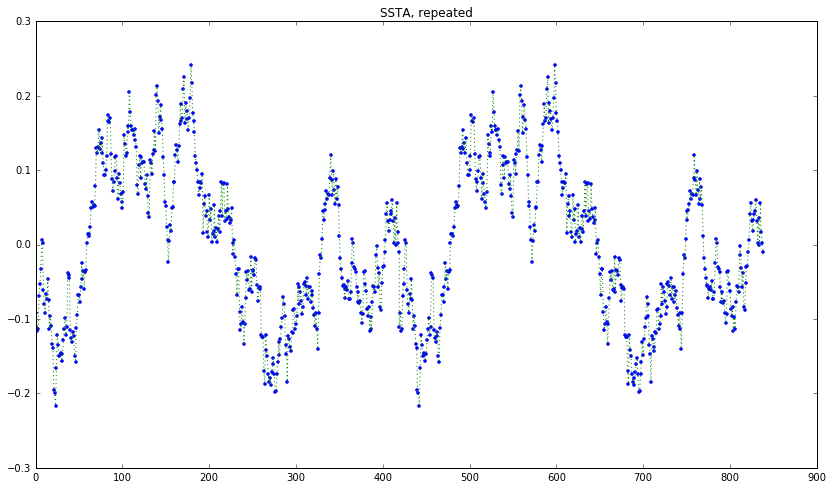

In [119]:
# Plot it, repeated since Fourier analysis assumes that
mm = concatenate((m, m+max(m)))
nn = concatenate((n, n       ))

# Plot the discrete values as dots '.', 
# connected by a dotted line ':'
figure(1, figsize=(14, 8))
plot(mm,nn,'.', label='raw')
plot(mm,nn,':', label='raw')
title('SSTA, repeated');

## SFT = Slow Fourier Transform (illustration)

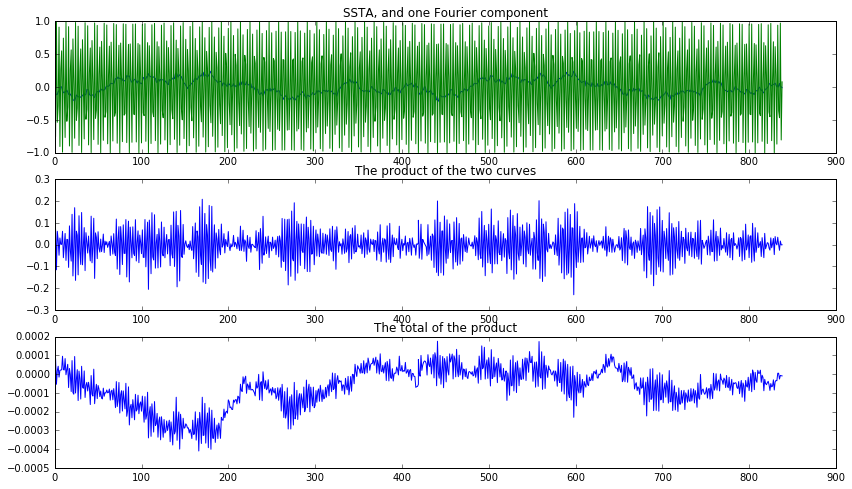

In [107]:
figure(13, figsize=(14, 8))
subplot(311)
plot(mm,nn)
title('SSTA, and one Fourier component')
plot(mm, sin(4*mm))

subplot(312)
product = nn * sin(4*mm)
plot(mm, product)
title('The product of the two curves')

subplot(313)
plot(mm, cumsum(product)/len(product))
title('The total of the product');

## Make the complex spectrum, using fft¶


In [110]:
N = len(n) 
spec = fft.fft(n) /N

# Unpack in all the usual ways: real (cos) and imaginary (sin)
specr = real(spec)
speci = imag(spec)

# Unpack in all the usual ways: amplitude and phase
ampli = abs(spec)
phase = angle(spec)

## Plot real and imaginary parts

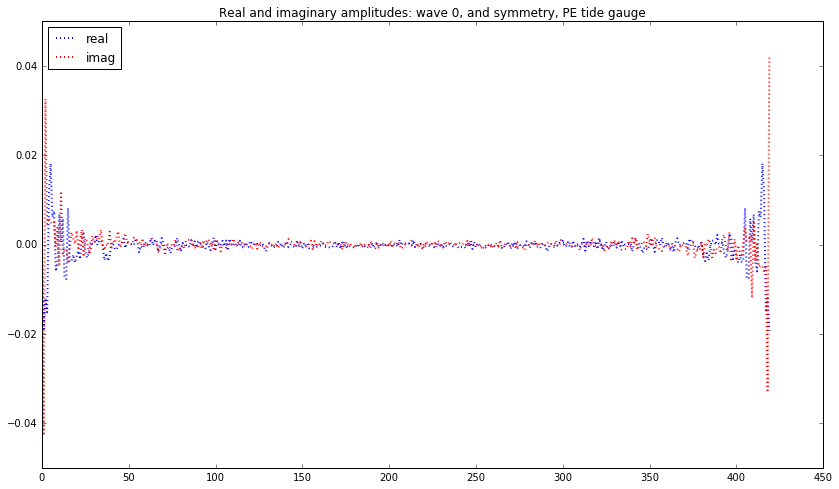

In [118]:
# Plot the real (blue) and imaginary (red) parts
figure(2,figsize(14,8))
#plot(specr,'bo', label='real')
plot(specr,'b:', label='real',lw=2) # lines connecting DISCRETE points 
#plot(speci,'ro', label='imag')
plot(speci,'r:', label='imag',lw=2) # lines are meaningless; for clarity
title('Real and imaginary amplitudes: wave 0, and symmetry, PE tide gauge')
legend(loc='best');

## Plot amplitude or power (amplitude squared) and phase

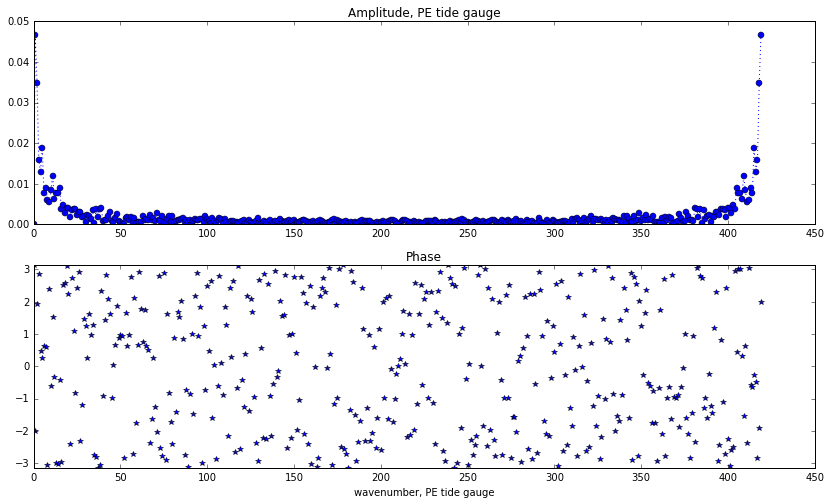

In [121]:
# Plot the amplitude and phase
figure(3)

subplot(211)
plot(ampli,'bo'); 
plot(ampli,'b:'); 
title('Amplitude, PE tide gauge')

subplot(212)
plot(phase   ,'b*')
title('Phase')
xlabel('wavenumber, PE tide gauge');
ylim([-pi,pi]);

## Tidy up the symmetry and labels for a nicer Power spectrum plot

In [122]:
# TAKE JUST THE LEFT HALF OF THE SYMMETRIC SPECTRUM
Wavenumbers = arange(N/2)

# BUT DOUBLE THE VALUEs, other than wavenumber 0
Amp2 = ampli[0:(N/2)] *2.
Amp2[0] = 0

# Now power spectrum density is amplitude squared
# But actually only 0.5x that, since var(sin(x))=var(cos(x))=0.5
Power = (Amp2**2) *0.5

/Users/weizhang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


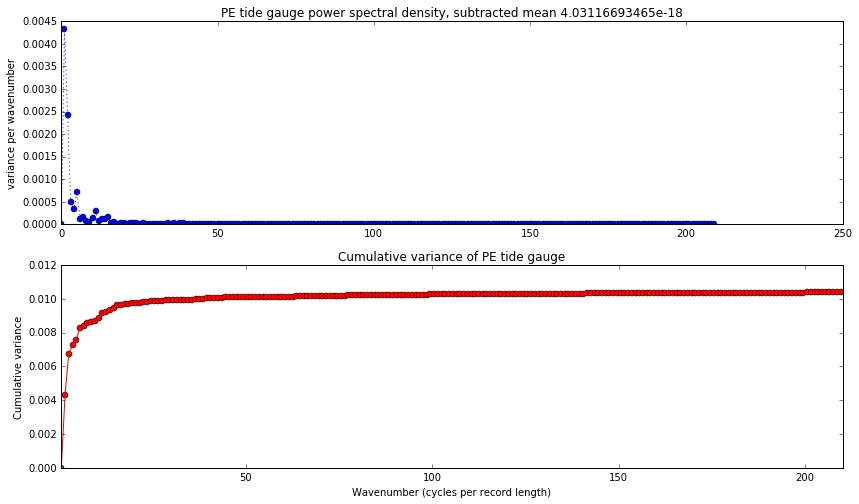

In [123]:
# Power spectral density plot
figure(4)
subplot(211)

plot(Wavenumbers,Power ,'bo')
plot(Wavenumbers,Power ,'b:')

title('PE tide gauge power spectral density, subtracted mean '+str(ampli[0]))
ylabel('variance per wavenumber');

# Cumulative power graph
CumWavenum  = concatenate(([-0.5],arange(N/2)+0.5))
CumVar      = concatenate(([0],   cumsum(Power) ))
                     
subplot(212)
plot(CumWavenum,CumVar,'ro')
plot(CumWavenum,CumVar,'r')
xlim([0.5,N/2])
title('Cumulative variance of PE tide gauge')
xlabel('Wavenumber (cycles per record length)')
ylabel('Cumulative variance');

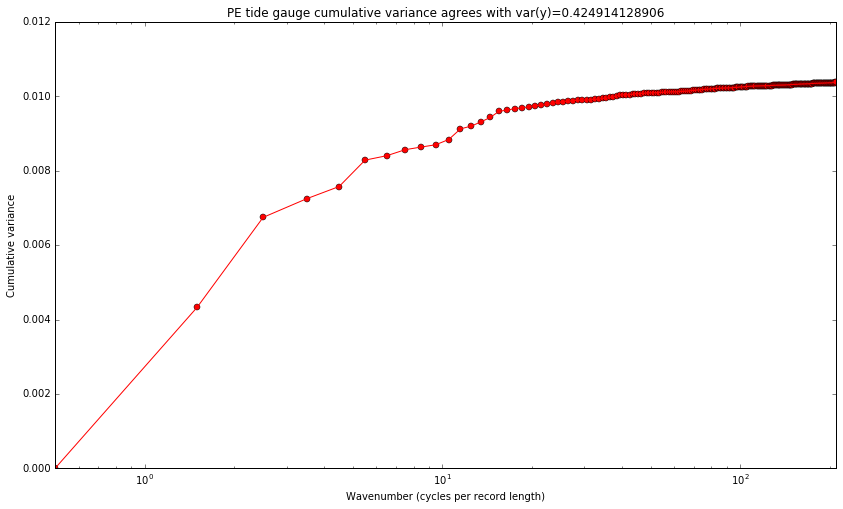

In [124]:
figure(5)
semilogx(CumWavenum,CumVar,'ro')
semilogx(CumWavenum,CumVar,'r')
xlim([0.5,N/2])
title('PE tide gauge cumulative variance agrees with var(y)='+ str(var(y)))
xlabel('Wavenumber (cycles per record length)')
ylabel('Cumulative variance');

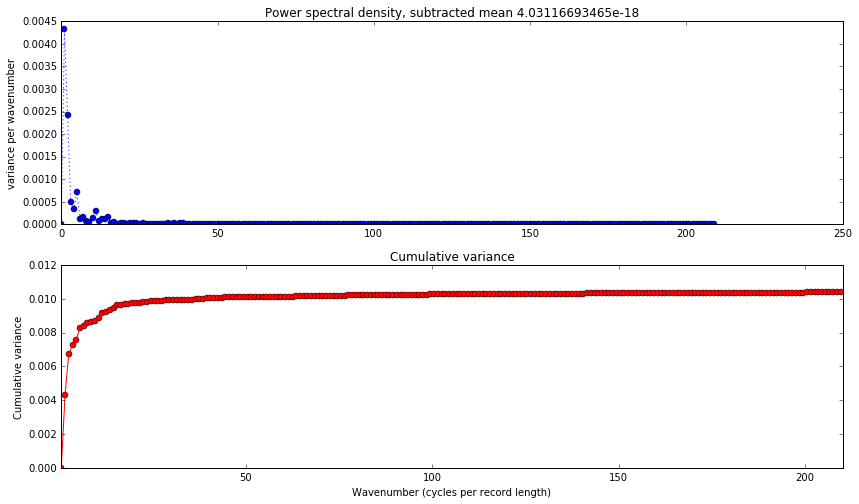

In [125]:
# Power spectral density plot
figure(4)
subplot(211)

plot(Wavenumbers,Power ,'bo')
plot(Wavenumbers,Power ,'b:')

title('Power spectral density, subtracted mean '+str(ampli[0]))
ylabel('variance per wavenumber');

# Cumulative power graph
CumWavenum  = concatenate(([-0.5],arange(N/2)+0.5))
CumVar      = concatenate(([0],   cumsum(Power) ))
                     
subplot(212)
plot(CumWavenum,CumVar,'ro')
plot(CumWavenum,CumVar,'r')
xlim([0.5,N/2])
title('Cumulative variance')
xlabel('Wavenumber (cycles per record length)')
ylabel('Cumulative variance');

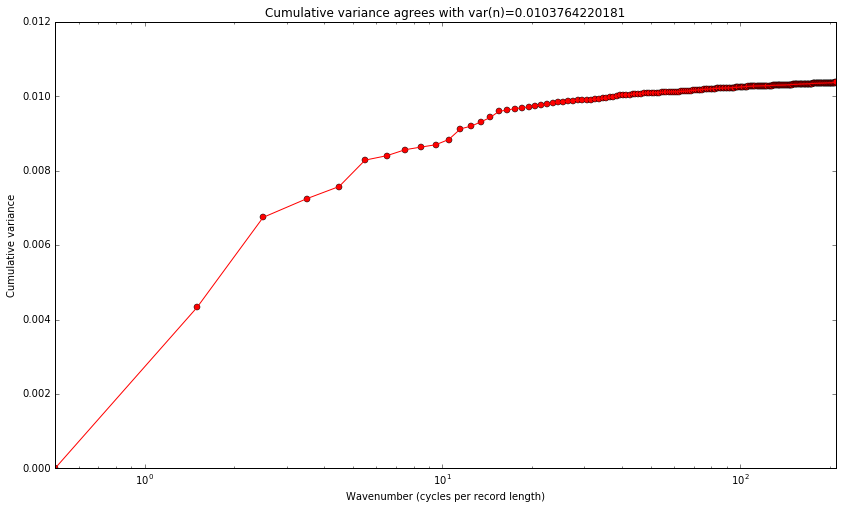

In [133]:
figure(5)
semilogx(CumWavenum,CumVar,'ro')
semilogx(CumWavenum,CumVar,'r')
xlim([0.5,N/2])
title('Cumulative variance agrees with var(n)='+ str(var(n)))
xlabel('Wavenumber (cycles per record length)')
ylabel('Cumulative variance');

In [127]:
print(mean(n**2))
print(var(n))

0.0103764220181
0.0103764220181


## Reconstruct (synthesize) data by meddling with phase.

In [128]:
# Edit the spectrum's phase and amplitude:
syn_ampli = ampli

# Phase=0 gives the autocorrelation function
syn_phase = phase*0; explabel = 'phase =0'

# Phase = rand() makes synthetic data
syn_phase = 2*pi*rand( len(phase) ); explabel = 'random phases'

## Build spectrum and invert, from edited amplitude and phase¶

In [129]:
# Build the synthetic spectrum from real and imaginary parts
syn_spec =(    syn_ampli*cos(syn_phase)   #real part
         + 1j* syn_ampli*sin(syn_phase) ) #imag part

# Synthesize back into physical space (time domain) with ifft: 
# First, we have to rescale by N = len(y). 
# And there is a near-zero imaginary part; strip it off with real()
syn_data = real( ifft(syn_spec)*N )

## Display the synthetic data¶


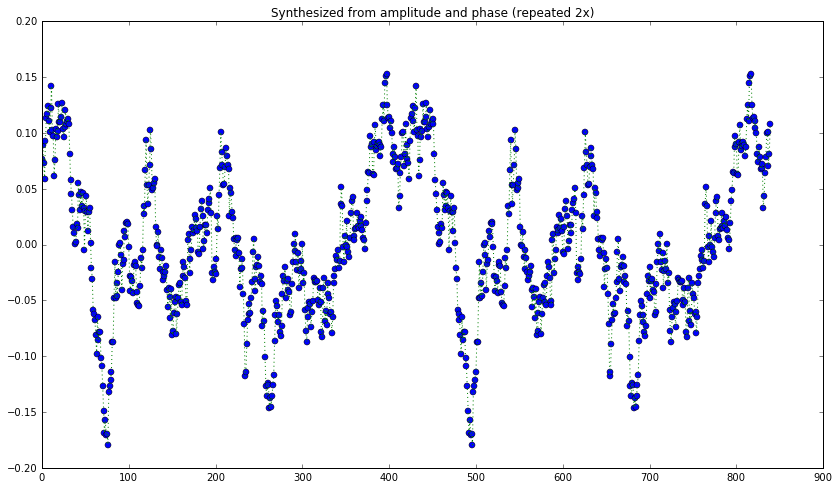

In [131]:
figure(6)
plot(tile(syn_data,2),'o')
plot(tile(syn_data,2),':')
title('Synthesized from amplitude and phase (repeated 2x)');


## Display the synthetic data on the raw data (Fig. 1)¶


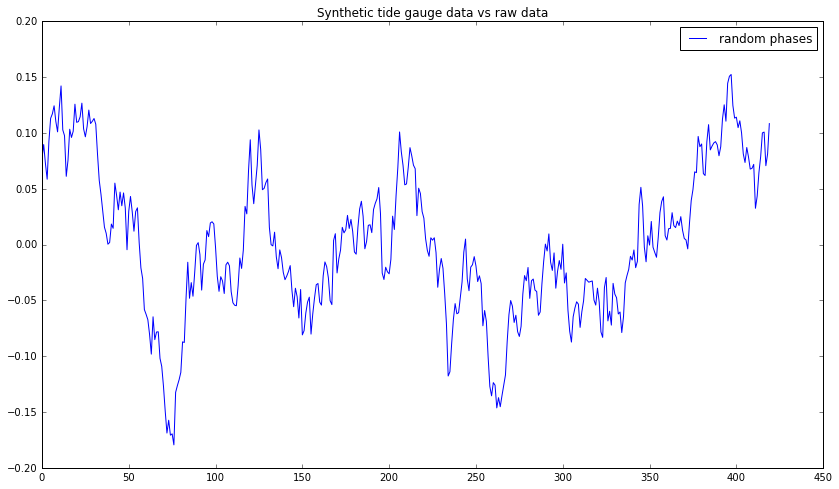

In [139]:
figure(1) # replot on top of the initial data plot (Fig. 1)
plot(m,syn_data, label=explabel)
legend(loc='best');
title('Synthetic tide gauge data vs raw data')

# RED NOISE FFT

### Make "red" noise, by specifying the scale for exponential autocorrelation.

#### How do you choose that scale?
Reasoning: Red noise has covariance that drops off exponentially with lag. So if C0 is the variance of the series, and C1 the covariance at a one-step lag, we want to know the value of τefold for which C1/C0=exp(δt/τefold). Solving, τefold=δt/ln(C1/C0)=δt/ln(r1) where r1 is the autocorrelation at lag 1.

In [143]:
# Calculate these for the second (Red Noise FFT) part of the notebook
print(var(n)) 
print(corrcoef(n, roll(n,1)))
print(len(n))

0.0103764220181
[[ 1.          0.96693144]
 [ 0.96693144  1.        ]]
420


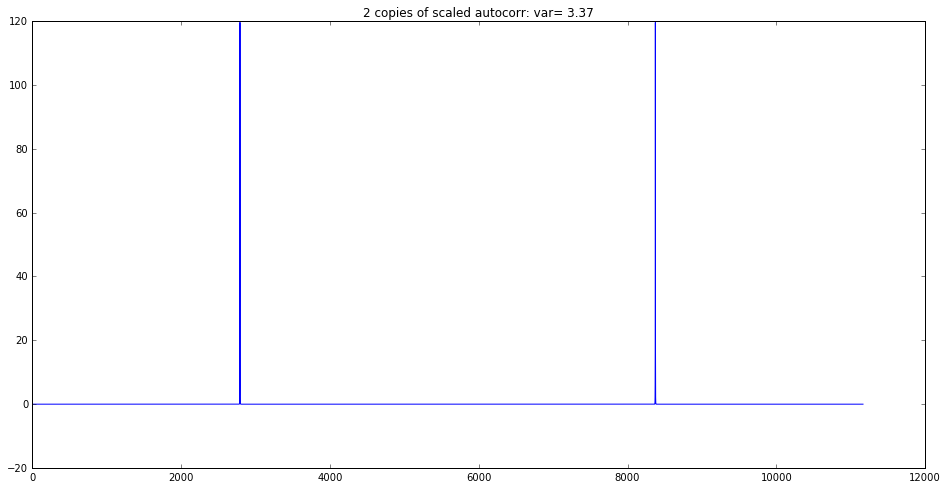

In [144]:
# Let's mimick a data array y, using AR1 red noise. 
# That only depends on autoregression at lag 1 (hence an "AR1 process")

# INPUTS
lag1_autocorr = 0.9999  # Read off this value from corrcoef(y, roll(y,1))
variance = 3.37        # Read off this value from var(y) 
N = 5583             # Read off this value from len(y)  



### CALCULATIONS AND PLOTTING
T_efold = 1.0/log(lag1_autocorr) # Units: number of array positions

### MAKE A YAUTO(X) ARRAY WITH THE RIGHT SIZE, VARIANCE, AND SPECTRUM
x = arange(N)              # A simple count array
xpert = x-mean(x)  
yauto = exp(- abs(xpert))  # Autocorrelation
# Scale it to have the given variance
yauto *= sqrt(variance/var(yauto))
# Remove the mean
yauto = detrend(yauto) 

figure(7,figsize=(16, 8))
### QUICK PLOT TO SEE IF IT IS SENSIBLE
plot(concatenate([yauto,yauto]))
title('2 copies of scaled autocorr: var='+format(var(yauto),'5.3'));

### Make the complex spectrum, using fft¶


In [145]:
N = len(yauto) 
spec = fft.fft(yauto) /N

# Unpack in all the usual ways: real (cos) and imaginary (sin)
specr = real(spec)
speci = imag(spec)

# Unpack in all the usual ways: amplitude and phase
ampli = abs(spec)
phase = angle(spec)

### Synthesize with smooth red spectrum, random phase.¶


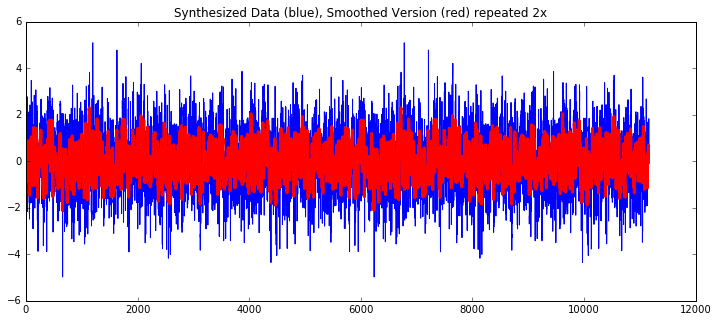

In [147]:
# Edit the spectrum's phase and amplitude:
syn_ampli = ampli

# Phase = rand() makes synthetic data
syn_phase = 2*pi*rand( len(phase) )

# Build the synthetic spectrum from real and imaginary parts
syn_spec =(    syn_ampli*cos(syn_phase)   #real part
         + 1j* syn_ampli*sin(syn_phase) ) #imag part

# Synthesize back into physical space (time domain) with ifft: 
# First, we have to rescale by N = len(y). 
# And there is a near-zero imaginary part; strip it off with real()
syn_data = real( ifft(syn_spec)*N )


figure(6, figsize=[12,5])
yy = tile(syn_data,2)
plot(yy)

# Overplot a smoothed version
kernel = 10
yysmoo = np.convolve(yy, np.ones((10,))/10, mode='valid')
plot(yysmoo, 'r', linewidth=3)
title('Synthesized Data (blue), Smoothed Version (red) repeated 2x');

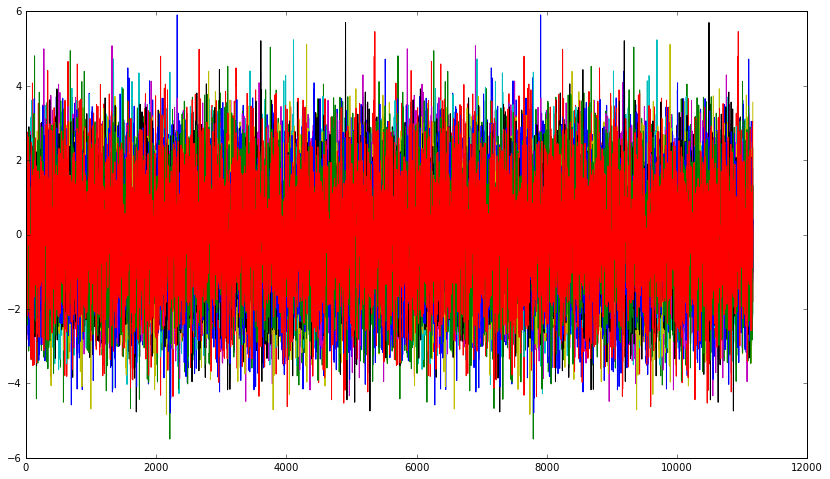

In [148]:
## More realizations with random phases

figure(6)

for i in arange(10): 
    syn_phase = 2*pi*rand( len(phase) )
    
    syn_spec =(    syn_ampli*cos(syn_phase)   #real part
             + 1j* syn_ampli*sin(syn_phase) ) #imag part
    
    syn_data = real( ifft(syn_spec)*N )
    
    plot(tile(syn_data,2),)